In [1]:
# Load necessary packages
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [2]:
# Load and inspect data
hr = pd.read_csv("data/HR_comma_sep.csv")
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Understanding the data format
hr.iloc[:,0:8].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [194]:
hr.iloc[:,8:10].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [195]:
# Examine columns sales and salary
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [196]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### One-hot encoding

To use all provided data in regression model, we need to transform string data by using one-hot enoding technique

<center><img src="./img/one_hot_coding_example.png" height=400 /></center>

In [14]:
# Do one-hot encoding
job_type = pd.get_dummies(hr.sales, prefix='job')
salary_level = pd.get_dummies(hr.salary, prefix='salary')
job_type

,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [15]:
# Create outcome vector and features dataframe
left = hr[['left']]
left = left['left'].ravel()
X = hr.drop(['left'], axis=1)

In [16]:
# Merge with X
job_type.reset_index(inplace=True)
salary_level.reset_index(inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, job_type, salary_level], axis=1)
X.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'index', 'job_IT',
       'job_RandD', 'job_accounting', 'job_hr', 'job_management',
       'job_marketing', 'job_product_mng', 'job_sales', 'job_support',
       'job_technical', 'index', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [17]:
# Drop unnecesarry columns
X = X.drop(['index','sales', 'salary', 'job_marketing', 'salary_medium'], axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,job_IT,job_RandD,job_accounting,job_hr,job_management,job_product_mng,job_sales,job_support,job_technical,salary_high,salary_low
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,0,1


### Tasks
* Estimate the model using robust standard errors
* Answer question: Who and why is leaving the company?

In [18]:
#check for multicollinearity
#use the graphic parameters below to get a well-sized heatmap
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 22})

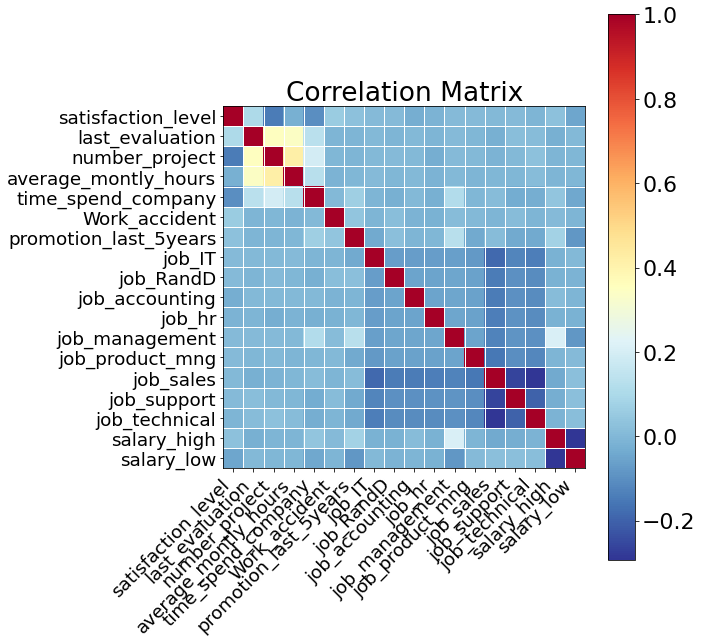

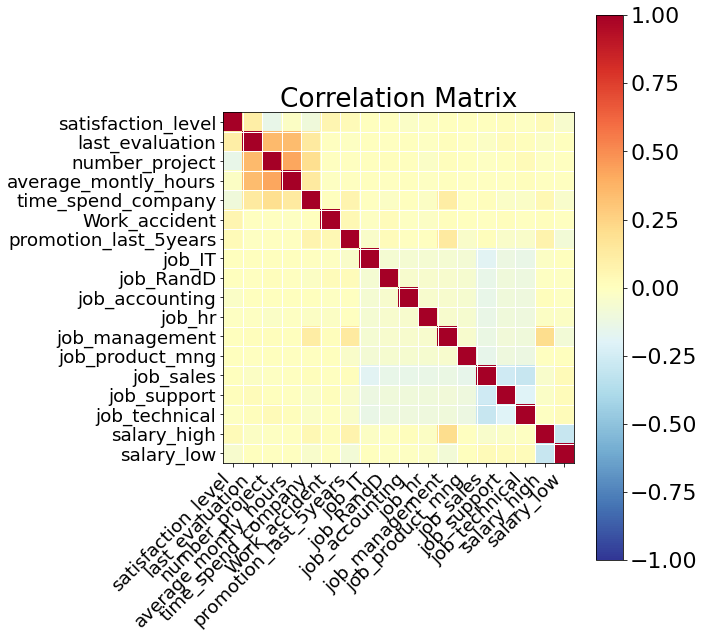

In [21]:
corr = X.corr()
smg.plot_corr(corr, xnames=corr.columns.values)
smg.plot_corr(corr, xnames=corr.columns.values, normcolor=True)
plt.show()

In [23]:
# Estimation of economist style model using robust standard errors

X = sm.add_constant(X)
model_sm = sm.Logit(left, X)
res_sm = model_sm.fit(method='newton', cov_type="hc0")
res_sm.summary()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2195
Time:                        12:07:33   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  hc0   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0752      0.179     -0.419      0.675      -0.427       0.276
satisfaction_level       -4.1357      0.104    -39.651      0.000      -4.340      -3.931
last_evaluation           0.7309      0.133      5.489      0.000       0.470       0.992
number_project           -0.3151      0.021    -15.060      0.000      -0.356      -0.274
average_montly_hours      0.0045      0.000      9.952      0.000       0.004       0.005
time_spend_company        0.2678      0.017     15.988      0.000       0.235       0.301
Work_accident            -1.5298      0.094    -16.346      0.000      -1.713      -1.346
promotion_last_5years    -1.4301      0.273     -5.234      0.000      -1.966      -0.895
job_IT                   -0.1686      0.123     -1.373      0.170      -0.409       0.072
job_RandD                -0.5703      0.150     -3.796      0.000      -0.865      -0.276
job_accounting            0.0121      0.135      0.090      0.928      -0.252       0.276
job_hr                    0.2445      0.132      1.848      0.065      -0.015       0.504
job_management           -0.4363      0.161     -2.704      0.007      -0.753      -0.120
job_product_mng          -0.1412      0.134     -1.050      0.294      -0.405       0.122
job_sales                -0.0267      0.104     -0.256      0.798      -0.231       0.178
job_support               0.0621      0.111      0.562      0.574      -0.155       0.279
job_technical             0.0822      0.109      0.756      0.450      -0.131       0.295
salary_high              -1.4132      0.140    -10.098      0.000      -1.688      -1.139
salary_low                0.5308      0.046     11.465      0.000       0.440       0.622
=========================================================================================
"""

### Who and why is leaving the company?

According to estimation data those who work in HR department will most likely leave the company
Main reasons is low salary combined with high last_evaluation score,<br/>especially for those who work in company for a long time.

In [ ]:
# last_evaluation, salary_low, time_spend_company, job_hr

### Task 2
Answer question Q2: What is the optimal threshold?

In [24]:
#create train and test set with parameters:
#test_size = 0.2, random_state = 111
X = X.drop(['const', 'job_IT', 'job_accounting', 'job_hr',
             'job_product_mng', 'job_sales', 'job_support', 'job_technical'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(
    X, left, test_size=0.2, random_state=111, stratify=left)

In [25]:
# Check outcome variable distribution, comment on the base model accuracy
y_train.mean(), y_test.mean()

#As majority of employees have not left the company(76.2%), our base model always predicts that the employee will
#stay at company.

(0.2381031752646054, 0.238)

(array([9142.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2857.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

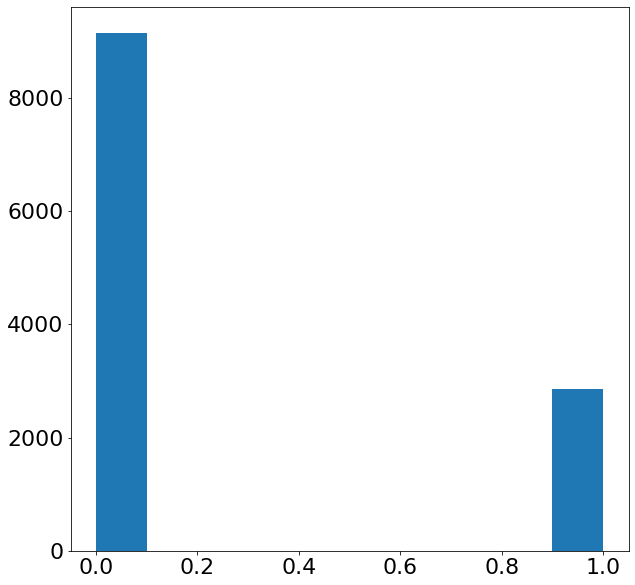

In [27]:
plt.hist(y_train)

In [28]:
# Define and train the logistic regression model, 
# Set random_state = 100, solver = 'liblinear')

model = LogisticRegression(random_state=100, solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(random_state=100, solver='liblinear')

'79.2%'

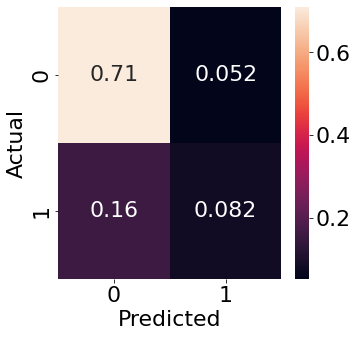

In [45]:
# Make predictions and calculate confusion matrix, compare to base model
plt.rcParams["figure.figsize"] = (5,5)

y_pred = model.predict(x_test)
cfm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
cfm = cfm / cfm.sum().sum()
sns.heatmap(cfm, annot=True)
accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]


# The accuracy of our model is 79.2% while the accuracy of base model is 76.2%
f"{accuracy.round(3)*100}%"

* Сalculate the ROC curve
* Improve the model by using ROC curve to calculate threshold
* Get probabilities for y_pred

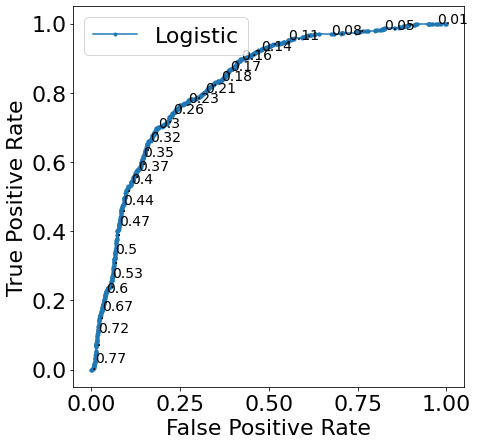

In [47]:
# Calculate ROC curve
plt.rcParams["figure.figsize"] = (7,7)
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]
y_pred.shape, y_prob.shape
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
str_thresholds = [str(round(x,2)) for x in thresholds]

sel = list(range(len(str_thresholds))[::2])
for ind in sel:
    str_thresholds[ind] = '.'

# Plot ROC curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

counter = 0
for i in range(len(thresholds)):
    if counter % 19 == 0:
        plt.text(fpr[i], tpr[i], str_thresholds[i], fontsize=14)
    
    counter += 1

plt.show()

In [ ]:
#experiment with the function below to find the optimal threshold
def calculate_confusion_matrix(y_test, y_prob, threshold):
    y_pred_t = 1*(y_prob >= threshold)
    cfm = pd.crosstab(y_test, y_pred_t, rownames=['Actual'], colnames=['Predicted'])
    cfm = cfm / cfm.sum().sum()
    accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
    #print("`Accuracy =  {:6.4f}".format(accuracy))
    return cfm, accuracy

In [84]:
#try different thresholds, comment on changes in confussion matrix
accuracy_plot_data = []
for t in thresholds[1:-1]:
    # if t < 1:
    _, accuracy = calculate_confusion_matrix(y_test, y_prob, t)
    accuracy_plot_data.append(accuracy)

Maximal accuracy: 81.0 with threshold: 0.4235925129488078


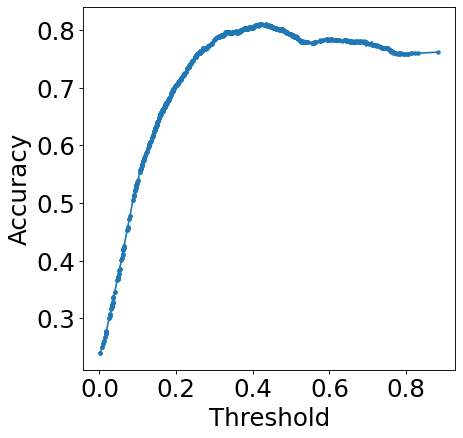

In [90]:
# Plot accuracy(threshold) plot

plt.figure(dpi=80, figsize=(6,6))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.plot(thresholds[1:-1], accuracy_plot_data, marker='.')

maximal_accuracy_value = max(accuracy_plot_data)
maximal_accuracy_threshold = thresholds[accuracy_plot_data.index(maximal_accuracy_value)+1]
print(f'Maximal accuracy: {round(maximal_accuracy_value, 2)*100}% with threshold: {maximal_accuracy_threshold}')

In [89]:
calculate_confusion_matrix(y_test, y_prob, maximal_accuracy_threshold)

(Predicted         0         1
 Actual                       
 0          0.689000  0.073000
 1          0.116333  0.121667,
 0.8106666666666666)